# Machine Learning com Sciki-Learn

## Pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando Dados

In [2]:
# prompt: Gere uma conexão com o drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Leitura do base
file = '/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/2-Cursos em Andamento com certificado/Python Para Análise de Dados e Data Science/Cap15 - scikit-learn/2-Cap15/dataset.csv'
df = pd.read_csv(file)

In [5]:
df.shape

(500, 2)

In [6]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [7]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória

In [10]:
# Verificando Valores Ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [11]:
# Verificando Valores Ausentes
df.isna().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [12]:
# Estatística Descritiva
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [13]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='salario', ylabel='Count'>

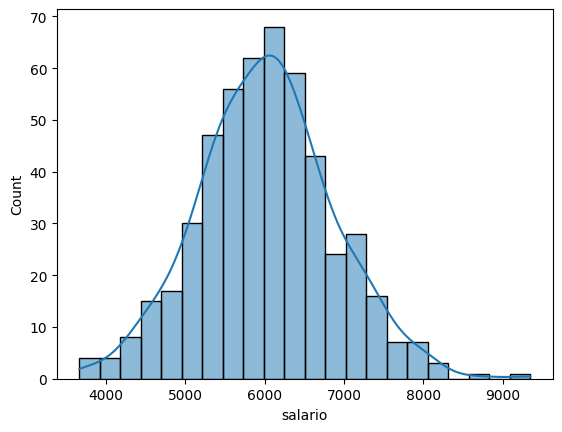

In [16]:
# Histograma da Variável Resposta
sns.histplot(data = df, x = 'salario', kde = True)

## Preparando os Dados

In [36]:
# Convertendo variável em array
X = np.array(df.horas_estudo_mes)

In [37]:
type(X)

numpy.ndarray

In [38]:
# Ajustar o shape de X
X = X.reshape(-1, 1)

In [39]:
# Preparando variável resposta
y = df.salario

Text(0, 0.5, 'Salário')

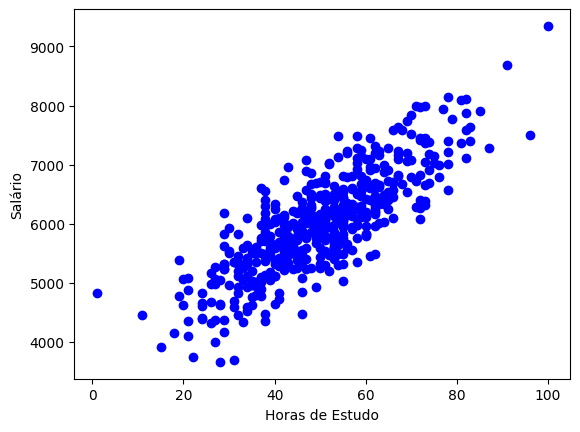

In [40]:
# Gráfico de Dispersão

plt.scatter(X, y, color = 'blue', label = 'Dados Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')

In [41]:
# Dividir dados em treitanmento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modelagem Preditiva (Machine Learning)

In [42]:
# Criando o objeto
modelo = LinearRegression()

In [43]:
# Ajustando o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

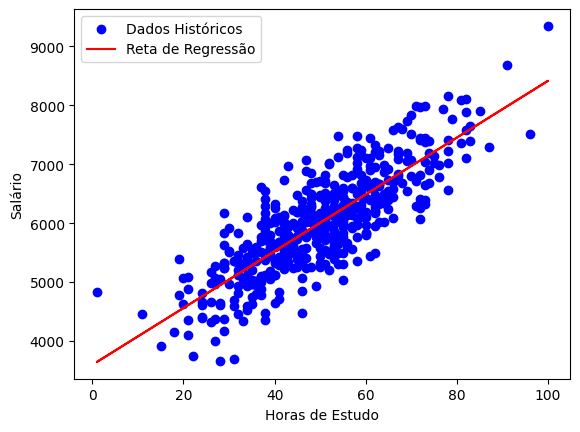

In [44]:
# Visualizar a reta de regressão
plt.scatter(X, y, color = 'blue', label = 'Dados Históricos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Reta de Regressão')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()

In [54]:
# Avaliação do modelo
score = modelo.score(X_teste, y_teste)
print('Coeficiente R^2: {:2f}'.format(score))

Coeficiente R^2: 0.593933


## Deploy do Modelo

In [62]:
# Definindo um novo valor para hosra de estudo
horas_estudo_novo = np.array([[48]])

# Fazendo previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print('Se o você estudar cerca de {} horas por mês seu salário pode ser igual a {}.'.format(horas_estudo_novo, salario_previsto))

Se o você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574].
